In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [ ]:
df = pd.read_csv("Retail_Sales_Data.csv", parse_dates=["Order_Date"])
print("Rows, Columns:", df.shape)
display(df.head())

Rows, Columns: (10000, 11)


,Order_ID,Order_Date,Customer_ID,Region,Category,Sub_Category,Quantity,Unit_Price,Discount,Sales,Profit
0,ORD-00001,2024-04-23,CUST-6734,North,Clothing,Dress,7,1613.43,0.06,10616.37,2600.19
1,ORD-00002,2024-08-08,CUST-9322,East,Electronics,Tablet,3,289.95,0.14,748.07,99.81
2,ORD-00003,2023-11-12,CUST-3433,North,Electronics,Tablet,6,207.18,0.22,969.60,275.99
3,ORD-00004,2023-11-21,CUST-9666,East,Furniture,Chair,5,1273.21,0.18,5220.16,270.23
4,ORD-00005,2024-03-26,CUST-4556,West,Electronics,Headphones,3,826.68,0.29,1760.83,293.51


In [ ]:
print("Null counts:\n", df.isnull().sum())

Null counts:
 Order_ID        0
Order_Date      0
Customer_ID     0
Region          0
Category        0
Sub_Category    0
Quantity        0
Unit_Price      0
Discount        0
Sales           0
Profit          0
dtype: int64


In [ ]:
for col in ["Quantity","Unit_Price","Discount","Sales","Profit"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [ ]:
df["Year"] = df["Order_Date"].dt.year
df["Month"] = df["Order_Date"].dt.month
df["Month_Year"] = df["Order_Date"].dt.to_period("M").astype(str)

In [ ]:
df.head()

,Order_ID,Order_Date,Customer_ID,Region,Category,Sub_Category,Quantity,Unit_Price,Discount,Sales,Profit,Year,Month,Month_Year
0,ORD-00001,2024-04-23,CUST-6734,North,Clothing,Dress,7,1613.43,0.06,10616.37,2600.19,2024,4,2024-04
1,ORD-00002,2024-08-08,CUST-9322,East,Electronics,Tablet,3,289.95,0.14,748.07,99.81,2024,8,2024-08
2,ORD-00003,2023-11-12,CUST-3433,North,Electronics,Tablet,6,207.18,0.22,969.60,275.99,2023,11,2023-11
3,ORD-00004,2023-11-21,CUST-9666,East,Furniture,Chair,5,1273.21,0.18,5220.16,270.23,2023,11,2023-11
4,ORD-00005,2024-03-26,CUST-4556,West,Electronics,Headphones,3,826.68,0.29,1760.83,293.51,2024,3,2024-03


In [ ]:
df["Unit_Cost_est"] = (df["Sales"] - df["Profit"]) / df["Quantity"]
df["Profit_Margin_pct"] = df["Profit"] / df["Sales"]
df.loc[df["Sales"]==0, "Profit_Margin_pct"] = 0

In [ ]:
df.head()

,Order_ID,Order_Date,Customer_ID,Region,Category,Sub_Category,Quantity,Unit_Price,Discount,Sales,Profit,Year,Month,Month_Year,Unit_Cost_est,Profit_Margin_pct
0,ORD-00001,2024-04-23,CUST-6734,North,Clothing,Dress,7,1613.43,0.06,10616.37,2600.19,2024,4,2024-04,1145.168571,0.244923
1,ORD-00002,2024-08-08,CUST-9322,East,Electronics,Tablet,3,289.95,0.14,748.07,99.81,2024,8,2024-08,216.086667,0.133423
2,ORD-00003,2023-11-12,CUST-3433,North,Electronics,Tablet,6,207.18,0.22,969.60,275.99,2023,11,2023-11,115.601667,0.284643
3,ORD-00004,2023-11-21,CUST-9666,East,Furniture,Chair,5,1273.21,0.18,5220.16,270.23,2023,11,2023-11,989.986000,0.051767
4,ORD-00005,2024-03-26,CUST-4556,West,Electronics,Headphones,3,826.68,0.29,1760.83,293.51,2024,3,2024-03,489.106667,0.166688


In [ ]:
total_revenue = df["Sales"].sum()
total_profit = df["Profit"].sum()
avg_order_value = df.groupby("Order_ID")["Sales"].sum().mean()
unique_customers = df["Customer_ID"].nunique()

In [ ]:
df.head()

,Order_ID,Order_Date,Customer_ID,Region,Category,Sub_Category,Quantity,Unit_Price,Discount,Sales,Profit,Year,Month,Month_Year,Unit_Cost_est,Profit_Margin_pct
0,ORD-00001,2024-04-23,CUST-6734,North,Clothing,Dress,7,1613.43,0.06,10616.37,2600.19,2024,4,2024-04,1145.168571,0.244923
1,ORD-00002,2024-08-08,CUST-9322,East,Electronics,Tablet,3,289.95,0.14,748.07,99.81,2024,8,2024-08,216.086667,0.133423
2,ORD-00003,2023-11-12,CUST-3433,North,Electronics,Tablet,6,207.18,0.22,969.60,275.99,2023,11,2023-11,115.601667,0.284643
3,ORD-00004,2023-11-21,CUST-9666,East,Furniture,Chair,5,1273.21,0.18,5220.16,270.23,2023,11,2023-11,989.986000,0.051767
4,ORD-00005,2024-03-26,CUST-4556,West,Electronics,Headphones,3,826.68,0.29,1760.83,293.51,2024,3,2024-03,489.106667,0.166688


In [ ]:
print(f"Total Revenue: ₹{total_revenue:,.2f}")
print(f"Total Profit: ₹{total_profit:,.2f}")
print(f"Average Order Value: ₹{avg_order_value:,.2f}")
print(f"Unique Customers: {unique_customers}")

Total Revenue: ₹44,484,676.17
Total Profit: ₹7,763,855.70
Average Order Value: ₹4,448.47
Unique Customers: 6026


In [ ]:
sales_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
profit_region = df.groupby("Region")["Profit"].sum().sort_values(ascending=False)
sales_cat = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
profit_cat = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)

In [ ]:
display(pd.DataFrame({"Sales": sales_region, "Profit": profit_region}))
display(pd.DataFrame({"Sales": sales_cat, "Profit": profit_cat}))

,Sales,Profit
Region,,
East,11184020.76,1966352.67
North,11068501.29,1924708.38
South,11294596.88,1947318.43
West,10937557.24,1925476.22


,Sales,Profit
Category,,
Electronics,11421043.15,1997070.60
Grocery,11180281.35,1961515.93
Clothing,11127027.84,1953206.50
Furniture,10756323.83,1852062.67


In [ ]:
monthly = df.groupby("Month_Year").agg({"Sales":"sum","Profit":"sum"}).reset_index()
monthly["Month_Year"] = pd.to_datetime(monthly["Month_Year"])
monthly = monthly.sort_values("Month_Year")

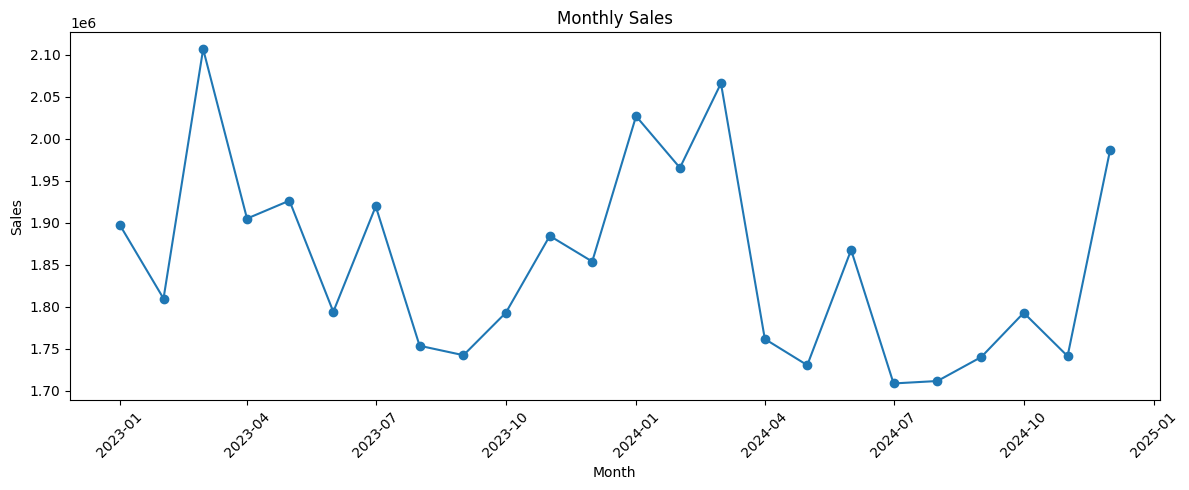

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(monthly["Month_Year"], monthly["Sales"], marker="o")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("monthly_sales.png")
plt.show()

In [ ]:
top_products = df.groupby("Sub_Category").agg({"Sales":"sum","Profit":"sum","Quantity":"sum"}).sort_values("Sales", ascending=False).head(10)
display(top_products)

,Sales,Profit,Quantity
Sub_Category,,,
Vegetables,3023366.01,526847.34,3293
Headphones,2982281.66,516550.77,3200
Jeans,2936865.12,509056.09,3357
Chair,2922474.32,485152.04,3222
Tablet,2900242.41,527031.24,3339
Mobile,2877804.86,484232.36,3136
Beverages,2836373.54,503226.35,3155
Dress,2786251.58,489387.99,3134
Jacket,2713071.27,490727.64,3038


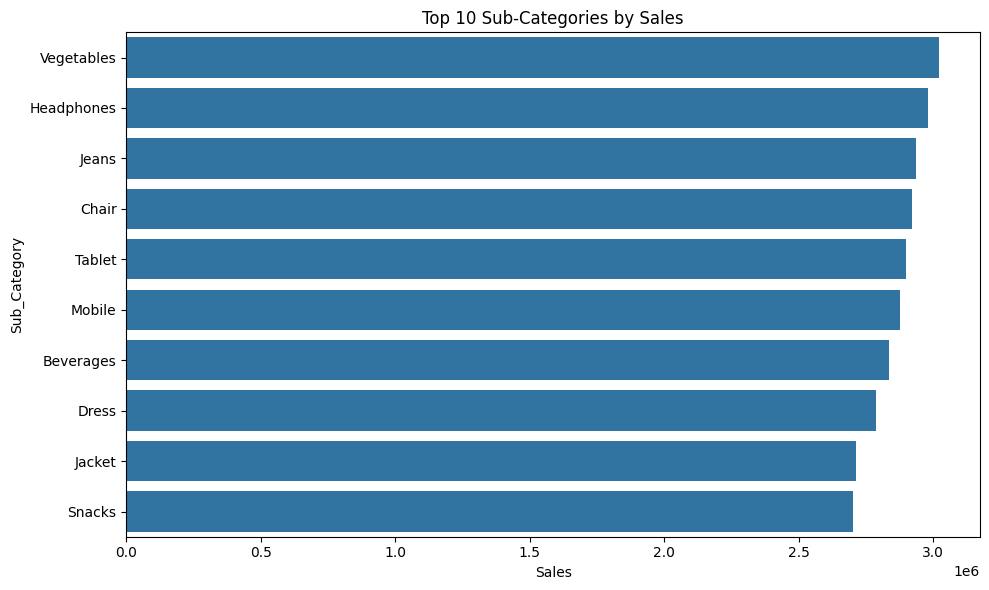

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_products["Sales"].values, y=top_products.index)
plt.title("Top 10 Sub-Categories by Sales")
plt.xlabel("Sales")
plt.tight_layout()
plt.savefig("top10_subcat_sales.png")
plt.show()

In [ ]:
cust_sales = df.groupby("Customer_ID").agg({"Sales":"sum","Order_ID":"nunique"}).rename(columns={"Order_ID":"Num_Orders"})
top_customers = cust_sales.sort_values("Sales", ascending=False).head(10)
display(top_customers)

,Sales,Num_Orders
Customer_ID,,
CUST-9276,44047.88,5
CUST-6701,40186.69,5
CUST-9448,36259.33,5
CUST-7090,35633.91,6
CUST-4114,34867.47,4
CUST-4942,34336.62,4
CUST-5482,34284.64,4
CUST-9298,34215.74,5
CUST-4185,34133.89,5


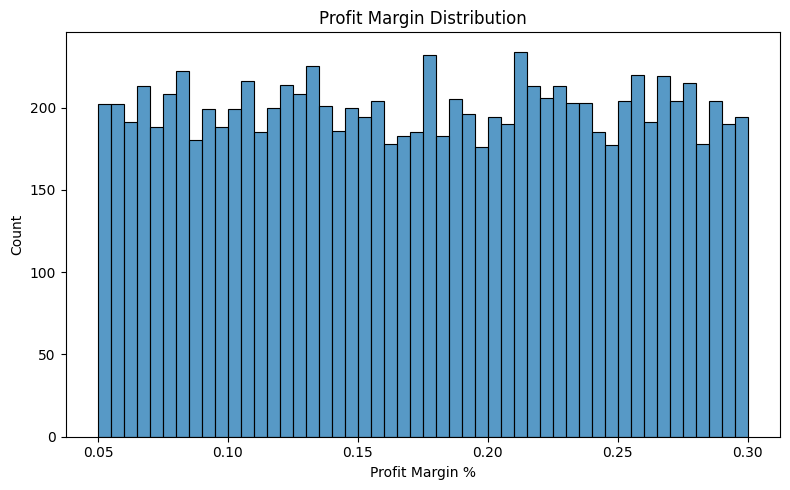

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Profit_Margin_pct"].dropna(), bins=50)
plt.title("Profit Margin Distribution")
plt.xlabel("Profit Margin %")
plt.tight_layout()
plt.savefig("profit_margin_dist.png")
plt.show()

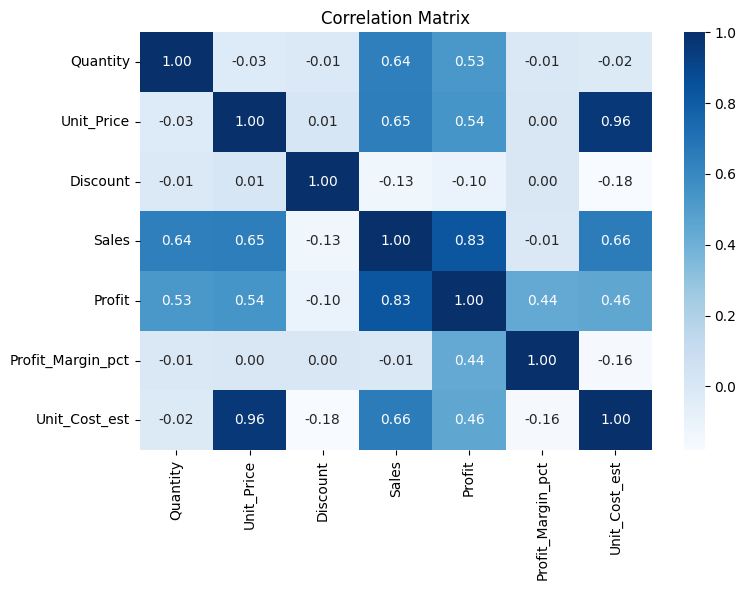

In [ ]:
corr_cols = ["Quantity","Unit_Price","Discount","Sales","Profit","Profit_Margin_pct","Unit_Cost_est"]
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("corr_matrix.png")
plt.show()

In [ ]:
sales_region.reset_index().to_csv("sales_by_region.csv", index=False)
top_products.reset_index().to_csv("top_products.csv", index=False)
cust_sales.reset_index().to_csv("customer_sales_summary.csv", index=False)

In [ ]:
print("Saved sample PNGs and summary CSVs.")

Saved sample PNGs and summary CSVs.
